In [6]:
!pip install yfinance
import yfinance as yf
import os

# Create the data directory if it doesn't exist
if not os.path.exists('data'):
    os.makedirs('data')

data = yf.download('EURUSD=X', start='2020-01-01', end='2024-01-01', interval='1d')
data.to_csv('data/forex_data.csv')




[*********************100%***********************]  1 of 1 completed

In [7]:
import pandas as pd

# Load data
df = pd.read_csv('data/forex_data.csv')

# Clean data
df.dropna(inplace=True)
df['Date'] = pd.to_datetime(df['Date'])






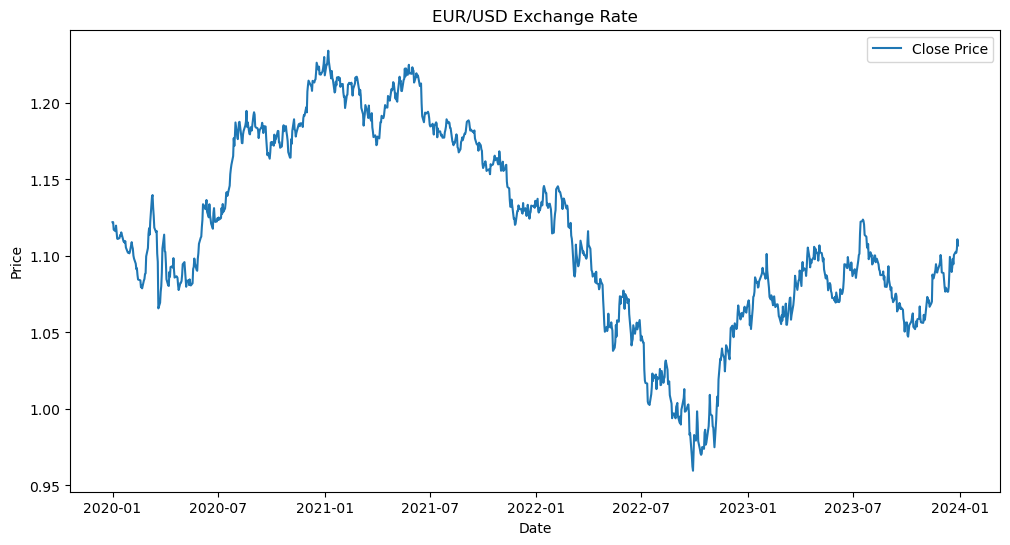

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Time series plot
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.title('EUR/USD Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [16]:
# Calculate daily returns
data['Return'] = data['Close'].pct_change()

# Display the first few rows with returns
print(data[['Close', 'Return']].head())



               Close    Return
Date                          
2020-01-01  1.122083       NaN
2020-01-02  1.122083  0.000000
2020-01-03  1.117144 -0.004401
2020-01-06  1.116196 -0.000848
2020-01-07  1.119799  0.003228


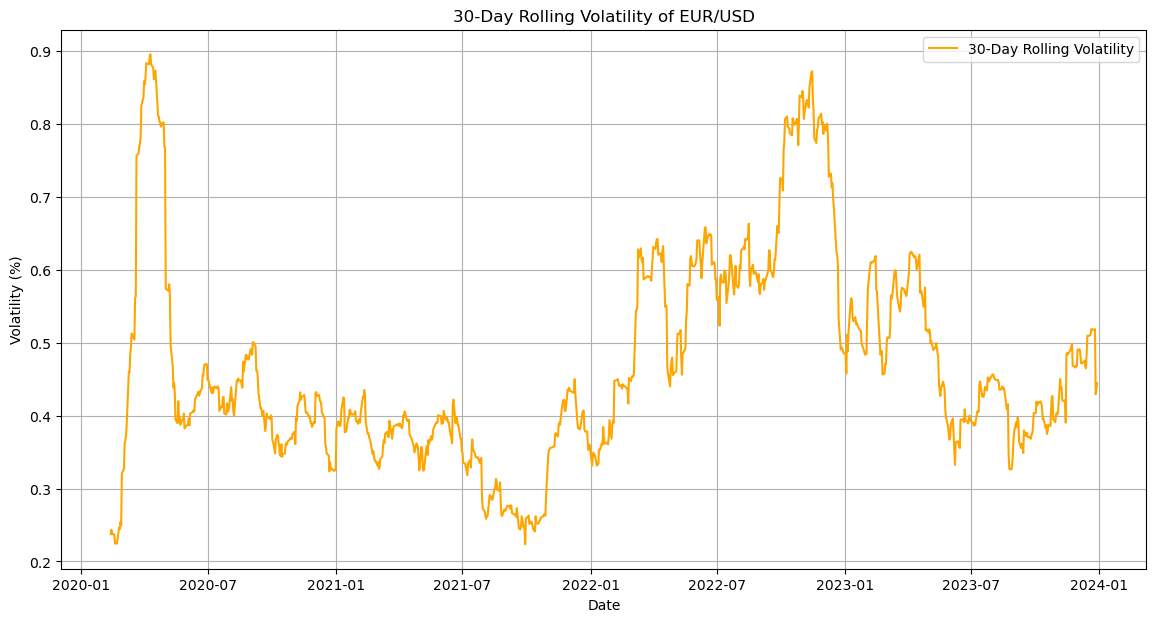

In [17]:
# Calculate rolling volatility (standard deviation of returns)
data['Volatility'] = data['Return'].rolling(window=30).std() * 100  # 30-day rolling volatility

# Plotting volatility
plt.figure(figsize=(14, 7))
plt.plot(data['Volatility'], label='30-Day Rolling Volatility', color='orange')
plt.title('30-Day Rolling Volatility of EUR/USD')
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.legend()
plt.grid()
plt.show()


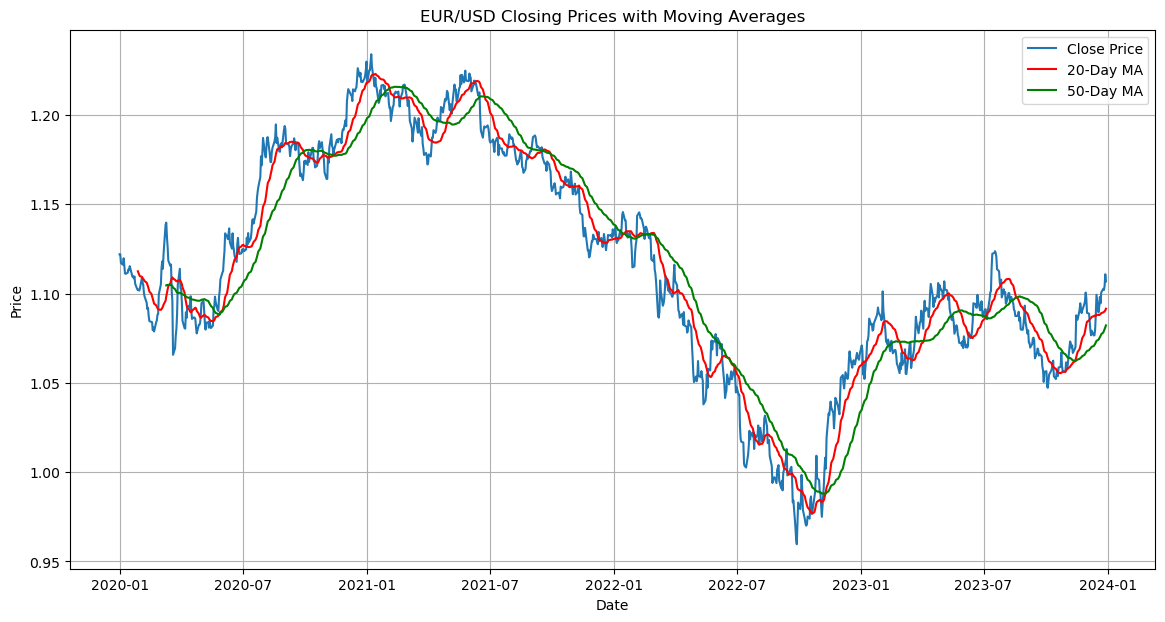

In [18]:
# Calculate moving averages
data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()

# Plot closing prices with moving averages
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['MA20'], label='20-Day MA', color='red')
plt.plot(data['MA50'], label='50-Day MA', color='green')
plt.title('EUR/USD Closing Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


[*********************100%***********************]  1 of 1 completed


                EUR/USD Return  GBP/USD Return
EUR/USD Return        1.000000        0.703578
GBP/USD Return        0.703578        1.000000


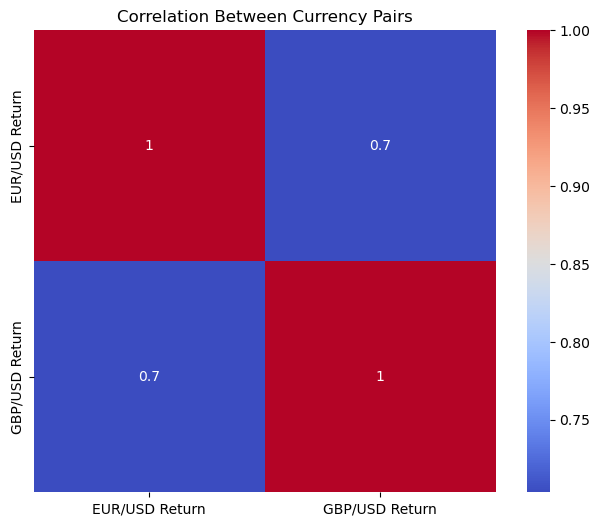

In [19]:
# Load additional currency pairs (for example, GBP/USD)
data_gbp = yf.download('GBPUSD=X', start='2020-01-01', end='2024-01-01', interval='1d')
data_gbp['Return'] = data_gbp['Close'].pct_change()

# Combine data for correlation analysis
combined_data = pd.concat([data['Return'], data_gbp['Return']], axis=1)
combined_data.columns = ['EUR/USD Return', 'GBP/USD Return']

# Calculate the correlation matrix
correlation = combined_data.corr()
print(correlation)

# Visualize the correlation matrix
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Between Currency Pairs')
plt.show()


In [21]:
data.to_csv('data/processed_forex_data.csv')
